# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

In the USA, most colleges use two types of testing metric to measure a student's ability to solve complex problems within a limit amount of time. The SAT was the original intelligence based test to gauge an individual and see their ability use reason and logic to approach a given problem or situation. Eventually, the testing to ACT was introduce to test an individuals academic knowledge which aligned better for high level education institutions. Given the data of 2017 and 2018 average scores per State, we want to examine if the test scores have increased or decreased year on year and hypothesize the implications of the result. In addition, participation rate of each exam is sampled in order to examine the relevance of each test per state as well as identify if it contributes to the average of scores. Ultimately, we want to examine if the change in scores is related to their participation rates and if the scores are affect by the rates.  

## Executive Summary

My initial thought before any data analysis was to look at the raw data and see if any trend can be seen just by looking at the numbers for just a particular year. Without performing any mathematical application to the data, a quick glance can give a good idea what I am looking at. Due to my lack to knowledge regarding how ACT testing methodology works, a quick research was necessary to understand how my comparison with modeling will be affected. After reading up on ACT and being up to speed, it was time to examine the data in aggregate. 

Initially, the data had some cleaning that needed to be done. Some of the columns within the data did not have the right datatype for mathematical analysis. Name consistency as well as score format was important so that modeling can stay consistent and the process will not show errors. Initially, I did the basic statistic summary which included finding the average, finding deviations from the mean, and looking at the minimum/maximum values of the data. This will give me a general idea of the spread in data points and see if anything looks out of the ordinary. Because ACT and SAT used different scaling, directly comparing them would be misleading. For easier maneuvering of data columns, names were changed to snake case and lower case to prevent any case senstive issues. The participation column was converted to an integer type but did not scale down the numbers into decimals since labeling the graphs with the appropriate scale will relieve any confusion of their size.

As I begin the modeling, I examined the overall distribution of scores for each year and each test. I noticed that the distribution renders a shape similar to a normal distribution curve and I suspect additional data will in fact, converse the shape toward a smooth curve. Next was overlaying the respective test scores over the 2 years and look for any observable differences without applying any statisical analysis to the numbers. Upon further discovery, it was concluded that the mean score for each test year on year did exhibit a decrease. 

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code: 
#importing csv file from data folder

sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
#checking the first 10 rows of the dataframe
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#checking the last 10 rows of the data frame
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: In sat_2017, it seems to provide the scores relative it their state within the USA. The scores appears to be state average of all participants seperated by their subject. However, not every state has high rate of participant for this exam.

in act_2017, there are more breakdowns of score that also shows each state's average within their subjects. There are more columns in this dataframe to present addition factors such as a science score and composite score.

#### 4a. Does the data look complete? 

The SAT 2017 dataset are the national average of scores.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

The minimum value for SAT scores should be no less than 300 and no more than 800 per subject. The total should not go below 600 and should not go above 1600. As for ACT, the minimum possible value for each inidividual subject is 1 with the highest possible value at 36. The composite is the average of all subjects for the ACT score and similarly, should be no less than 1 and higher than 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# checking statistics of ACT rows and obersiving any oddities
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [6]:
# checking statistics of ACT rows and obersiving any oddities
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [8]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:The 2017 SAT data has a minimum of 52 for one of the math scores which seems like a typo. The ACT 2017 dataset has a letter 'x' within the composite column which turned it into an object. In addition, one of the rows had a 2.3 for the science score.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
#code
#created function to assist in removing special characters from their columns

def removing_symbols(dataframe, symbol, series_name):
    dataframe[str(series_name)] = dataframe[str(series_name)].apply(lambda x: int(x.replace(symbol,'')))
    return dataframe[str(series_name)]


In [10]:
#reassigning correct values to their location
sat_2017.loc[20, 'Math'] = 524
act_2017.loc[21, 'Science'] = 23.2

In [11]:
act_2017['Participation'] = removing_symbols(act_2017, '%', 'Participation')
sat_2017['Participation'] = removing_symbols(sat_2017, '%', 'Participation')

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#code
act_2017['Composite'][51] = '20.2'
act_2017.loc[:, 'Composite'] = act_2017['Composite'].astype(float)

C:\Users\eyip1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
#code
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [14]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

- Display the data types again to confirm they are correct.

In [15]:
#Code:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [16]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
#code
act_2017.columns = act_2017.columns.str.lower()
sat_2017.columns = sat_2017.columns.str.lower()

In [18]:
act_2017.rename(columns={'participation': 'participation_act_2017', 
                         'english': 'english_act_2017', 
                         'math': 'math_act_2017', 
                         'reading': 'reading_act_2017', 
                         'science': 'science_act_2017', 
                         'composite': 'composite_act_2017'}, inplace = True)

In [19]:
sat_2017.rename(columns={'participation': 'participation_sat_2017',  
                         'math': 'math_sat_2017', 
                         'evidence-based reading and writing': 'reading_sat_2017', 
                         'total': 'total_sat_2017'}, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#code
act_2017.drop([0], axis = 0, inplace = True)
act_2017.reset_index(drop = True, inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
# Check if there are anything outside intersection
set(act_2017.state) - set(sat_2017.state)
set(sat_2017.state) - set(act_2017.state)

set()

In [22]:
#Code:
# act_and_sat_2017 = pd.concat([sat_2017, act_2017], keys = sa)
act_and_sat_2017 = pd.merge(left = act_2017, right = sat_2017, on = "state")

In [23]:
act_and_sat_2017.dtypes

state                      object
participation_act_2017      int64
english_act_2017          float64
math_act_2017             float64
reading_act_2017          float64
science_act_2017          float64
composite_act_2017        float64
participation_sat_2017      int64
reading_sat_2017            int64
math_sat_2017               int64
total_sat_2017              int64
dtype: object

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [24]:
#code

act_and_sat_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [25]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')   #adding two additional csv files for 2018 data
act_2018 = pd.read_csv('../data/act_2018.csv')

In [26]:
act_2018.info() # checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [27]:
sat_2018.info()# checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
Unnamed: 5                            0 non-null float64
Unnamed: 6                            0 non-null float64
Unnamed: 7                            0 non-null float64
dtypes: float64(6), object(2)
memory usage: 3.3+ KB


In [28]:
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [29]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,51.000000,51.000000,51.000000,0.0,0.0,0.0
mean,563.686275,556.235294,1120.019608,NaN,NaN,NaN
std,47.502627,47.772623,94.155083,NaN,NaN,NaN
min,480.000000,480.000000,977.000000,NaN,NaN,NaN
25%,534.500000,522.500000,1057.500000,NaN,NaN,NaN
50%,552.000000,544.000000,1098.000000,NaN,NaN,NaN
75%,610.500000,593.500000,1204.000000,NaN,NaN,NaN
max,643.000000,655.000000,1298.000000,NaN,NaN,NaN


In [30]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Alabama,6%,595.0,571.0,1166.0,NaN,NaN,NaN
1,Alaska,43%,562.0,544.0,1106.0,NaN,NaN,NaN
2,Arizona,29%,577.0,572.0,1149.0,NaN,NaN,NaN
3,Arkansas,5%,592.0,576.0,1169.0,NaN,NaN,NaN
4,California,60%,540.0,536.0,1076.0,NaN,NaN,NaN


In [31]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [32]:
act_2018.rename(columns={'Participation': 'participation_act_2018',
                         'Composite': 'composite_act_2018', 
                         'State': 'state'}, inplace = True)
sat_2018.rename(columns={'Participation': 'participation_sat_2018',             #renaming columns to their specific data file
                         'Math': 'math_sat_2018', 
                         'Evidence-Based Reading and Writing': 'reading_sat_2018', 
                         'Total': 'total_sat_2018', 
                         'State': 'state'}, inplace = True)

In [33]:
act_2018 = act_2018.dropna(how = 'all', axis = 1)
act_2018 = act_2018.dropna(how = 'all', axis = 0)           #dropping all null columns and rows
sat_2018 = sat_2018.dropna(how = 'all', axis = 1)
sat_2018 = sat_2018.dropna(how = 'all', axis = 0)

In [34]:
act_2018['participation_act_2018'] = removing_symbols(act_2018, '%', 'participation_act_2018')
sat_2018['participation_sat_2018'] = removing_symbols(sat_2018, '%', 'participation_sat_2018')     #converting the participation column to float

In [35]:
act_2018.drop([20], axis = 0, inplace = True)             #removing the duplication row with Maine
act_2018.reset_index(drop = True, inplace = True)         #resetting the index after removing the row

In [36]:
set(sat_2018['state']) - set(act_2018['state']) #finding the which row in each dataframe is not matching in the state column

{'District of Columbia'}

In [37]:
act_2018.loc[8, 'state'] = 'District of Columbia' #fixing the name for D.C.

In [38]:
set(sat_2018['state']) - set(act_2018['state']) #checking for any other mismatch names in the state column

set()

In [39]:
act_and_sat_2018 = pd.merge(left = act_2018, right = sat_2018, on = "state") #merging the 2 dataframes

In [40]:
act_and_sat_2018.head() #check the first 5 rows of the combined dataframe

,state,participation_act_2018,composite_act_2018,participation_sat_2018,reading_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,100,19.1,6,595.0,571.0,1166.0
1,Alaska,33,20.8,43,562.0,544.0,1106.0
2,Arizona,66,19.2,29,577.0,572.0,1149.0
3,Arkansas,100,19.4,5,592.0,576.0,1169.0
4,California,27,22.7,60,540.0,536.0,1076.0


In [41]:
act_and_sat_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [42]:
act_and_sat_final = pd.merge(left = act_and_sat_2017, right = act_and_sat_2018, on = "state")

In [43]:
act_and_sat_final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [44]:
#Code:
act_and_sat_final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,composite_act_2018,participation_sat_2018,reading_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.725490,21.496078,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.037085,2.111583,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [45]:
#code

#defined standard deviation formula into a function using the population size

def s_d(series):    
    avg = sum(series) / len(series)
    holder = []
    for i in series:
        squared_diff = (i - avg) ** 2
        holder.append(squared_diff)
    
    sum_of_values = sum(holder)
    avg_of_sum = sum_of_values / len(series)
    S_D = avg_of_sum ** .5
    return S_D



In [46]:
s_d(act_and_sat_final['composite_act_2017'])

2.000786081581989

In [47]:
np.std(act_and_sat_final['composite_act_2017'])

2.000786081581989

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
#Code:

# {columns: float("{0:.6}".format(s_d(act_and_sat_final[columns]))) for columns in act_and_sat_final.columns[1:]} 
# the code above works but only for this specific data set; the code below is comprehensive to all data sets

# this dictionary comprehensiion takes all the columns as elements and iterates within the columns from the data frame to 
# check for any values within are numbers. If yes, they apply the standard deviation function to the entire column 

numeric_df = act_and_sat_final.select_dtypes(include = [np.number])
{columns: float("{0:.5}".format(s_d(act_and_sat_final[columns]))) for columns in numeric_df}

{'participation_act_2017': 31.824,
 'english_act_2017': 2.3305,
 'math_act_2017': 1.9625,
 'reading_act_2017': 2.0469,
 'science_act_2017': 1.7222,
 'composite_act_2017': 2.0008,
 'participation_sat_2017': 34.929,
 'reading_sat_2017': 45.217,
 'math_sat_2017': 46.657,
 'total_sat_2017': 91.584,
 'participation_act_2018': 33.702,
 'composite_act_2018': 2.0908,
 'participation_sat_2018': 36.947,
 'reading_sat_2018': 47.035,
 'math_sat_2018': 47.302,
 'total_sat_2018': 93.227}

Do your manually calculated standard deviations match up with the output from pandas describe? What about numpy's std method?

The results matched with numpy but not the describe method. This due to numpy using the population size for value (n) where describe method uses the sample size which is (n-1). This will affect the result for the standard deviation. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [49]:
#code
act_and_sat_final.sort_values('total_sat_2017', ascending = False)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,composite_act_2018,participation_sat_2018,reading_sat_2018,math_sat_2018,total_sat_2018
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,1295,99,21.3,4,643.0,655.0,1298.0
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,1291,100,20.5,3,641.0,653.0,1294.0
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,1275,68,21.8,3,634.0,631.0,1265.0
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,1271,100,20.0,4,633.0,629.0,1262.0
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,1260,71,21.6,4,633.0,631.0,1265.0
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,1256,98,20.3,2,640.0,643.0,1283.0
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,1253,100,20.1,3,629.0,623.0,1252.0
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,1247,100,20.2,4,630.0,618.0,1248.0
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,1242,100,18.6,3,630.0,606.0,1236.0
44,Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,1238,100,20.4,4,480.0,530.0,1010.0


#### Highest Participation Rate by State:

ACT 2017 - Alabama, Kentucky, Wisconsin, Utah, Tennessee, South, Carolina, Oklahoma, North, Carolina, Nevada, Montana,                    Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado

ACT 2018 - Maine

SAT 2017 - Washington D.C., Michigan, Delaware, Connecticut 

SAT 2018 - Colorado, Connecticut, Delaware, Michigan, Idah



#### Lowest Participation Rate by State:

ACT 2017 - Maine

ACT 2018 - Maine

SAT 2017 - Iowa, Mississippi, North Dakota

SAT 2018 - North Dakota

#### Highest Score by State:

ACT 2017 - New Hampshire

ACT 2018 - Connecticut

SAT 2017 - Minnesota 

SAT 2018 - Nevada (note: A West Coast State scores rather low for SAT exams, low population)


#### Lowest Score by State:

ACT 2017 - Maine (note: East Coast City similar to D.C. that did not excel in the ACT)

ACT 2018 - Maine

SAT 2017 - Washington D.C. (note: an East Coast District is scoring very low SAT exams, low population)

SAT 2018 - Washington D.C.

### ACT Testing with change in participation from 2017 to 2018:

Minnesota and Colorado

### SAT Testing with change in participation from 2017 to 2018:

Connecticut, Delaware, Washington D.C., and Michigan

In [50]:
act_and_sat_final[(act_and_sat_final['participation_act_2018'] > 50) & (act_and_sat_final['participation_sat_2018'] > 50)]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,composite_act_2018,participation_sat_2018,reading_sat_2018,math_sat_2018,total_sat_2018
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,1017,66,19.9,56,550.0,549.0,1099.0
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,1050,53,21.4,70,542.0,522.0,1064.0
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,1085,89,18.9,56,480.0,530.0,1010.0
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,1081,100,19.1,52,554.0,543.0,1098.0
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,1064,100,18.3,55,547.0,523.0,1070.0


States with over 50% participation rate for for ACT and SAT in 2017:
Florida, Georgia, and Hawaii

States with over 50% participation rate for for ACT and SAT in 2018:
Florida, Georgia, Hawaii, North Carolina, and South Carolina

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

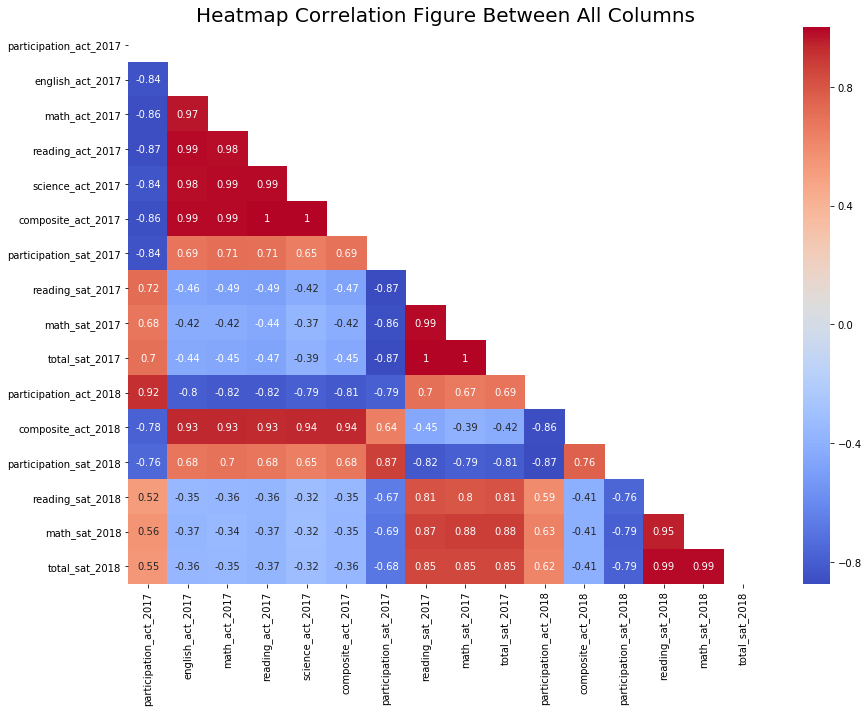

In [51]:
plt.figure(figsize=(13,10))

mask = np.zeros_like(act_and_sat_final.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(act_and_sat_final.corr(), mask = mask, cmap = 'coolwarm', annot = True)



plt.xticks(rotation= 90)


plt.title('Heatmap Correlation Figure Between All Columns', fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Heatmap.png')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [52]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, y_labels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
                
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,9)) # You'll want to specify your figsize
                
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
                
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 20) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(str(list_of_xlabels[i]))
        ax[i].set_ylabel(str(y_labels))
        ax[i].set_title(str(list_of_titles[i]), fontsize = 15)
        plt.tight_layout()        

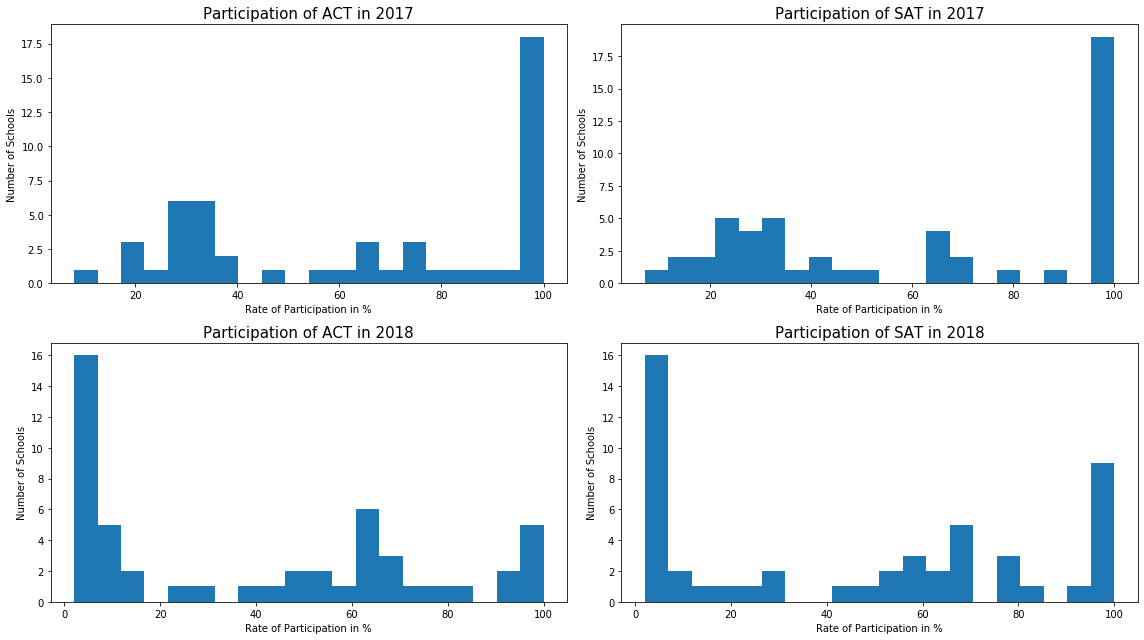

In [53]:
subplot_histograms(act_and_sat_final, 
                   ['participation_act_2017', 'participation_act_2018', 'participation_sat_2017', 'participation_sat_2018'], 
                   ['Participation of ACT in 2017', 'Participation of SAT in 2017', 'Participation of ACT in 2018', 'Participation of SAT in 2018'], 
                   ['Rate of Participation in %', 'Rate of Participation in %', 'Rate of Participation in %', 'Rate of Participation in %'],
                   'Number of Schools')

# plt.savefig('../graphs/Subplot.png')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

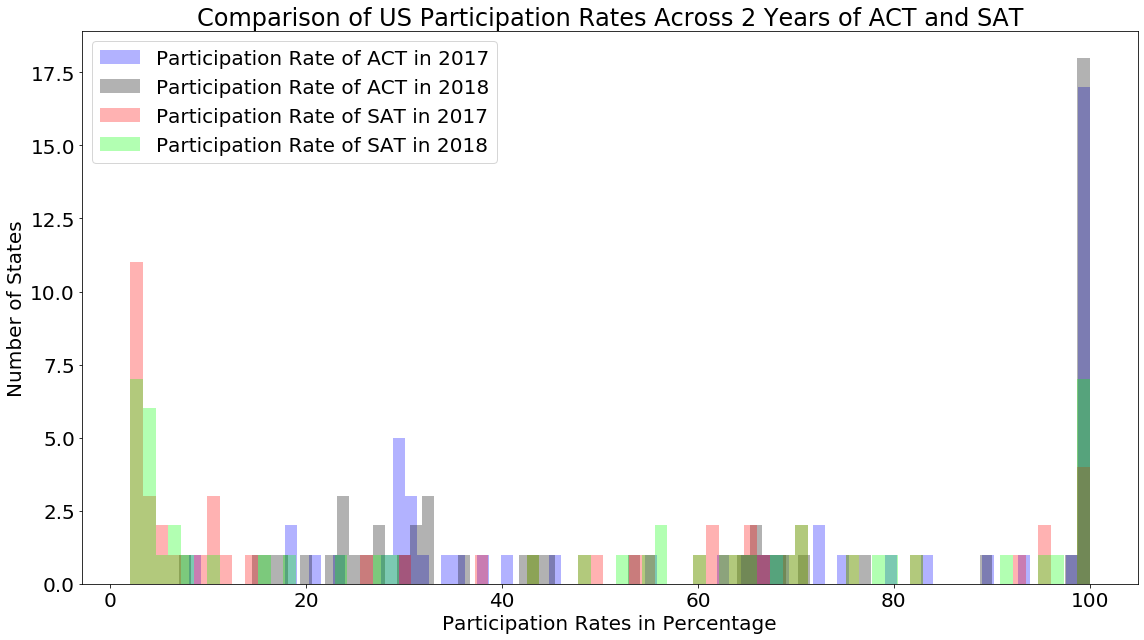

In [54]:
# Code
plt.figure(figsize=(16,9))

act_and_sat_final['participation_act_2017'].hist(bins = 75, label = 'Participation Rate of ACT in 2017', xlabelsize = 20, grid = False,color = (0, 0, 1, .3))
act_and_sat_final['participation_act_2018'].hist(bins = 75, label = 'Participation Rate of ACT in 2018', ylabelsize = 20, grid = False,color = (0, 0, 0, .3))
act_and_sat_final['participation_sat_2017'].hist(bins = 75, label = 'Participation Rate of SAT in 2017', grid = False, color = (1, 0, 0, .3))
act_and_sat_final['participation_sat_2018'].hist(bins = 75, label = 'Participation Rate of SAT in 2018', grid = False, color = (0, 1, 0, .3))


plt.xlabel('Participation Rates in Percentage', fontsize = 20)
plt.ylabel('Number of States', fontsize = 20)

plt.title('Comparison of US Participation Rates Across 2 Years of ACT and SAT', fontsize = 24)


plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Comparison_Participation_ACT_SAT_2_years.png')

The graph above shows a distribution of all participation rates for 2017 and 2018 on both exams. 

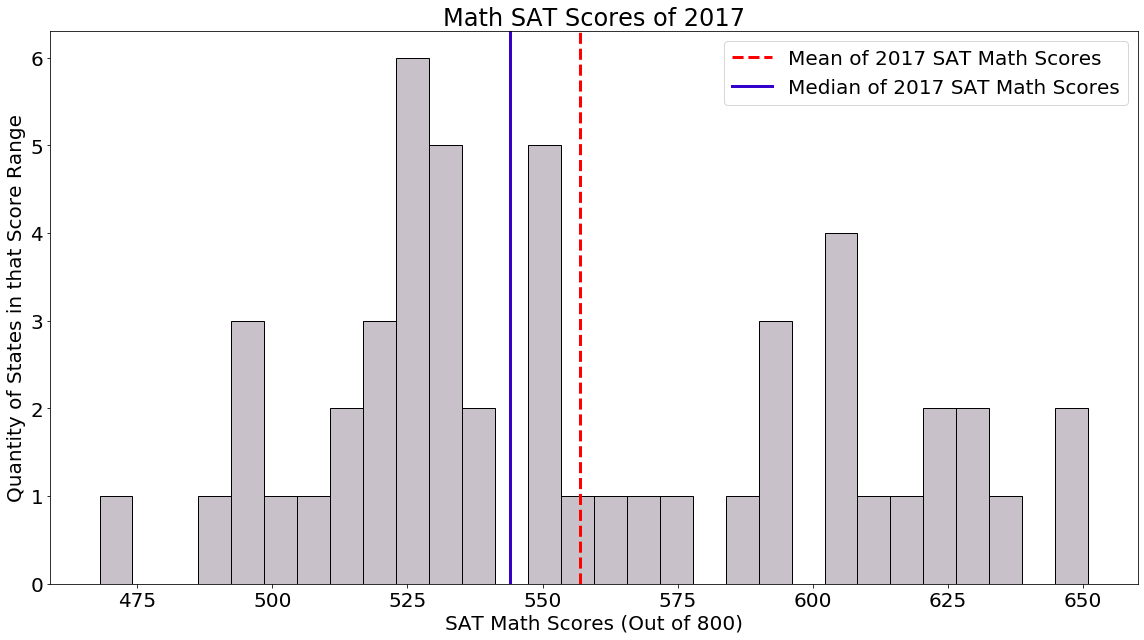

In [55]:
# Code


plt.figure(figsize=(16,9))

act_and_sat_final['math_sat_2017'].hist(bins = 30, 
                                        xlabelsize = 20, 
                                        ylabelsize = 20, 
                                        grid = False, 
                                        color = (.3, .2, .3, .3), 
                                        edgecolor = 'black')


plt.axvline(act_and_sat_final['math_sat_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            lw = 3, 
            label = 'Mean of 2017 SAT Math Scores')
plt.axvline(act_and_sat_final['math_sat_2018'].median(), 
            color = (.2, 0, .8), 
            lw = 3, 
            label = 'Median of 2017 SAT Math Scores')



plt.xlabel('SAT Math Scores (Out of 800)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('Math SAT Scores of 2017', fontsize = 24)

plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Math_Scores_SAT_2017.png')

The graph above shows all SAT Math test scores across the country in 2017 with their median below the mean.

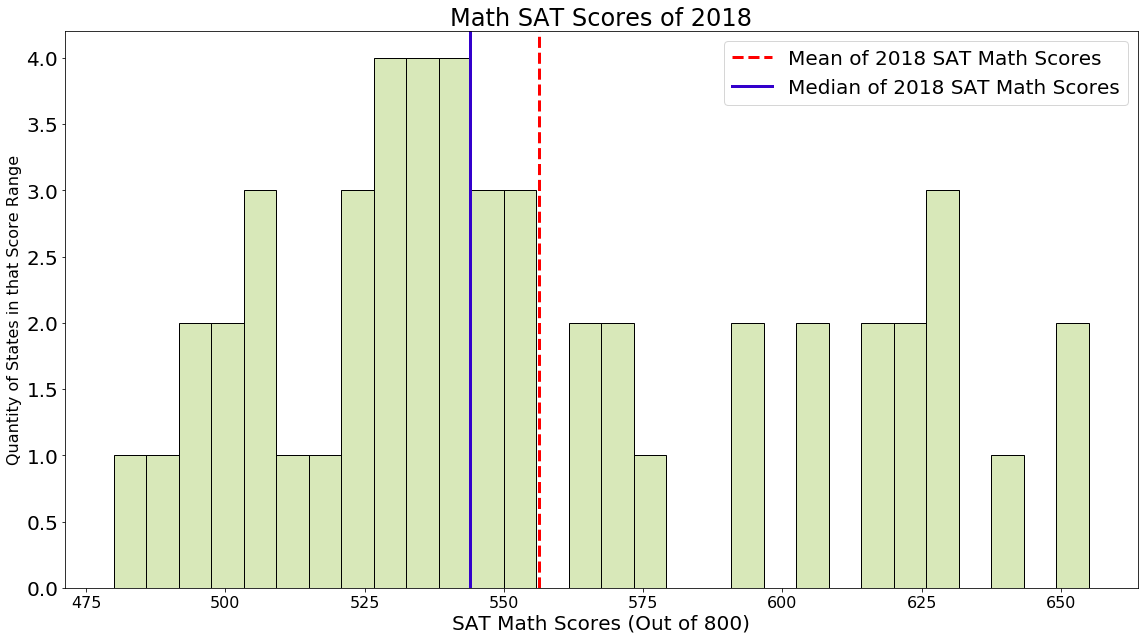

In [56]:
# Code
plt.figure(figsize=(16,9))

act_and_sat_final['math_sat_2018'].hist(bins = 30, 
                                        xlabelsize = 16, 
                                        ylabelsize = 20, 
                                        grid = False, 
                                        color = (.5, .7, .1, .3), 
                                        edgecolor = 'black')


plt.axvline(act_and_sat_final['math_sat_2018'].mean(), 
            color = 'red', 
            linestyle = '--', 
            lw = 3, 
            label = 'Mean of 2018 SAT Math Scores')
plt.axvline(act_and_sat_final['math_sat_2018'].median(), 
            color = (.2, 0, .8), 
            lw = 3, 
            label = 'Median of 2018 SAT Math Scores')




plt.xlabel('SAT Math Scores (Out of 800)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 16)
plt.title('Math SAT Scores of 2018', fontsize = 24)

plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Math_Scores_SAT_2018.png')

The graph above shows all SAT Math test scores across the country in 2018 with their median below the mean.

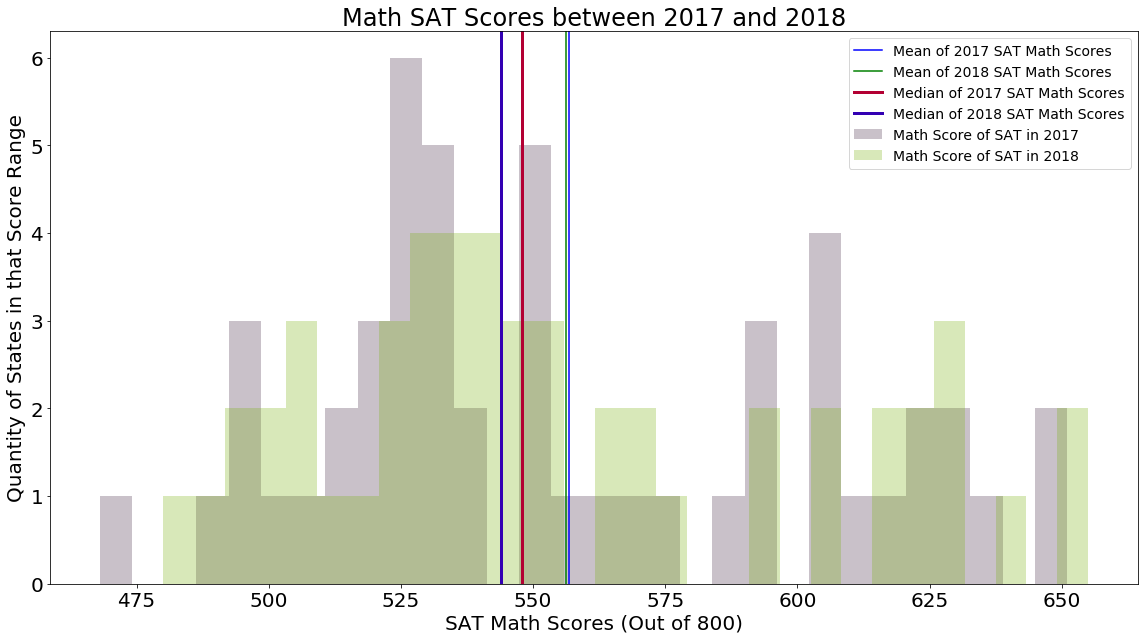

In [57]:
plt.figure(figsize=(16,9))

act_and_sat_final['math_sat_2017'].hist(bins = 30, 
                                        label = 'Math Score of SAT in 2017', 
                                        xlabelsize = 20, 
                                        grid = False, 
                                        color = (.3, .2, .3, .3))
act_and_sat_final['math_sat_2018'].hist(bins = 30, 
                                        label = 'Math Score of SAT in 2018', 
                                        ylabelsize = 20, 
                                        grid = False, 
                                        color = (.5, .7, .1, .3))


plt.axvline(act_and_sat_final['math_sat_2017'].mean(), 
            color = 'b', 
            label = 'Mean of 2017 SAT Math Scores')
plt.axvline(act_and_sat_final['math_sat_2018'].mean(), 
            color = 'g', 
            label = 'Mean of 2018 SAT Math Scores')
plt.axvline(act_and_sat_final['math_sat_2017'].median(), 
            color = (.7, 0, .2), 
            lw = 3, 
            label = 'Median of 2017 SAT Math Scores')
plt.axvline(act_and_sat_final['math_sat_2018'].median(), 
            color = (.2, 0, .7), 
            lw = 3, 
            label = 'Median of 2018 SAT Math Scores')





plt.xlabel('SAT Math Scores (Out of 800)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('Math SAT Scores between 2017 and 2018', fontsize = 24)



plt.legend(fontsize = 14)
plt.tight_layout();

# plt.savefig('../graphs/Math_Scores_SAT_2017_and_2018.png')

A comparison between SAT math scores from 2017 and 2018. We can observe a familiar shape of a normal curve being formed. If there were for data, the data will approach normal due to the center limit theorem.

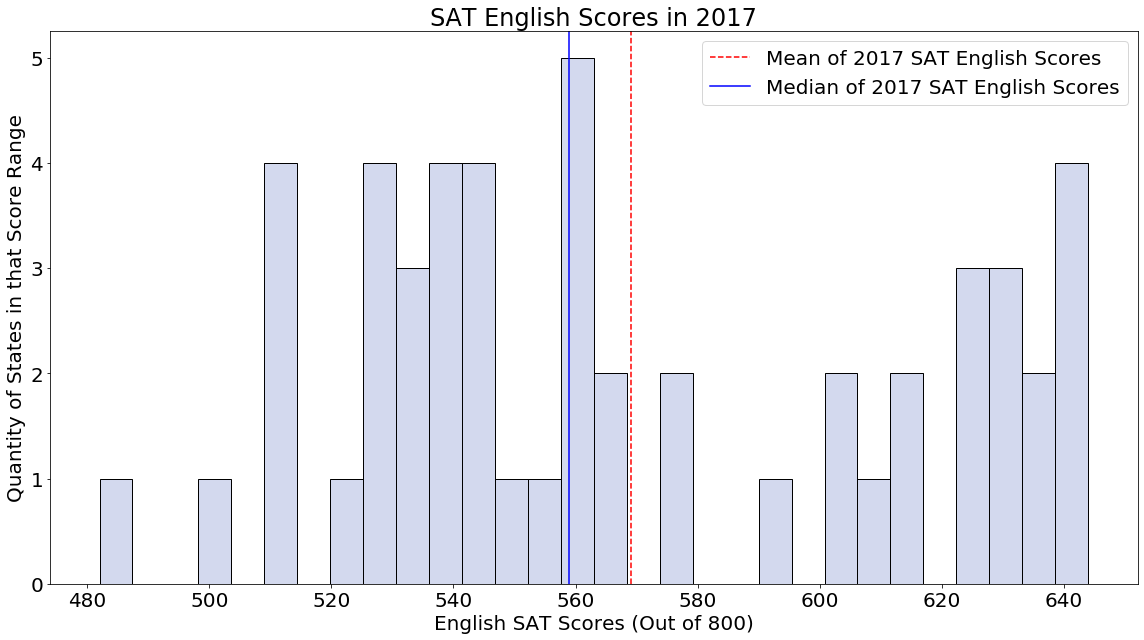

In [58]:
# Code
plt.figure(figsize=(16,9))

act_and_sat_final['reading_sat_2017'].hist(bins = 30, 
                                           xlabelsize = 20, 
                                           ylabelsize = 20, 
                                           grid = False, 
                                           color = (.14, .27, .67, .2), 
                                           edgecolor = 'black')

plt.axvline(act_and_sat_final['reading_sat_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2017 SAT English Scores')
plt.axvline(act_and_sat_final['reading_sat_2017'].median(), 
            color = 'b', 
            label = 'Median of 2017 SAT English Scores')


plt.xlabel('English SAT Scores (Out of 800)', 
           fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', 
           fontsize = 20)

plt.title('SAT English Scores in 2017', 
          fontsize = 24)

plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Eng_Scores_2017.png')

The graph above shows the English test scores for the SAT in 2017. The data is a bit more flat here. 

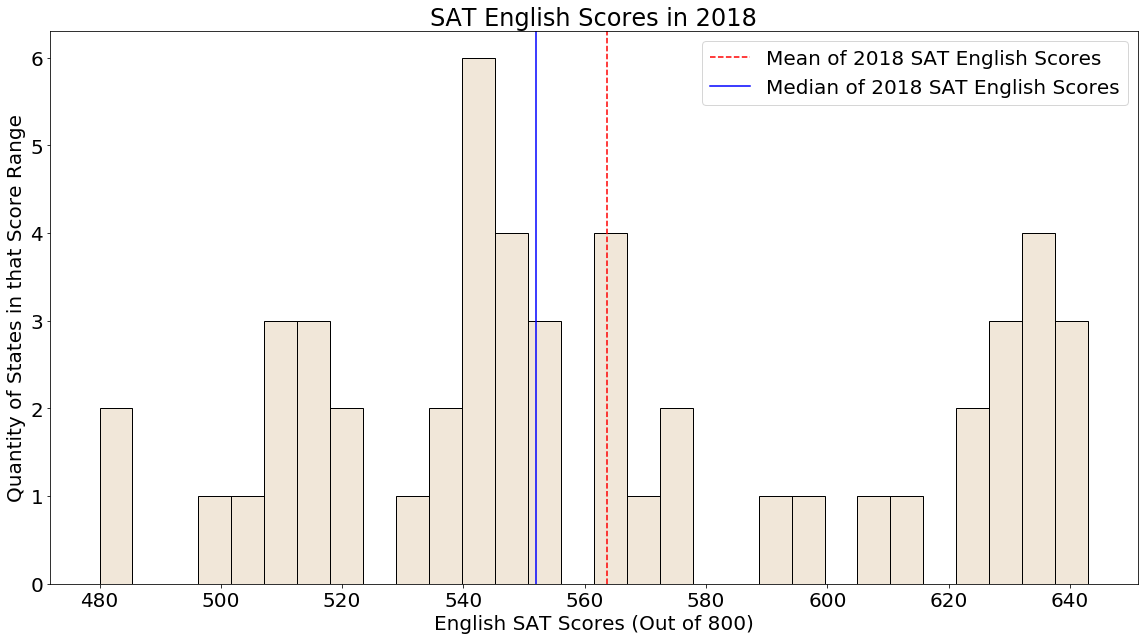

In [59]:
# Code
plt.figure(figsize=(16,9))

act_and_sat_final['reading_sat_2018'].hist(bins = 30, 
                                           xlabelsize = 20, 
                                           ylabelsize = 20, 
                                           grid = False, 
                                           color = (.73, .54, .26, .2), 
                                           edgecolor = 'black')


plt.axvline(act_and_sat_final['reading_sat_2018'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2018 SAT English Scores')
plt.axvline(act_and_sat_final['reading_sat_2018'].median(), 
            color = 'b', 
            label = 'Median of 2018 SAT English Scores')


plt.xlabel('English SAT Scores (Out of 800)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('SAT English Scores in 2018', fontsize = 24)

plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Eng_SAT_Scores_2018.png')

The graph ahove shows the distribution of the 2018 SAT english scores. In 2018, it appears the test scores are more spread out and showing a tendency to approach a normal distribution.

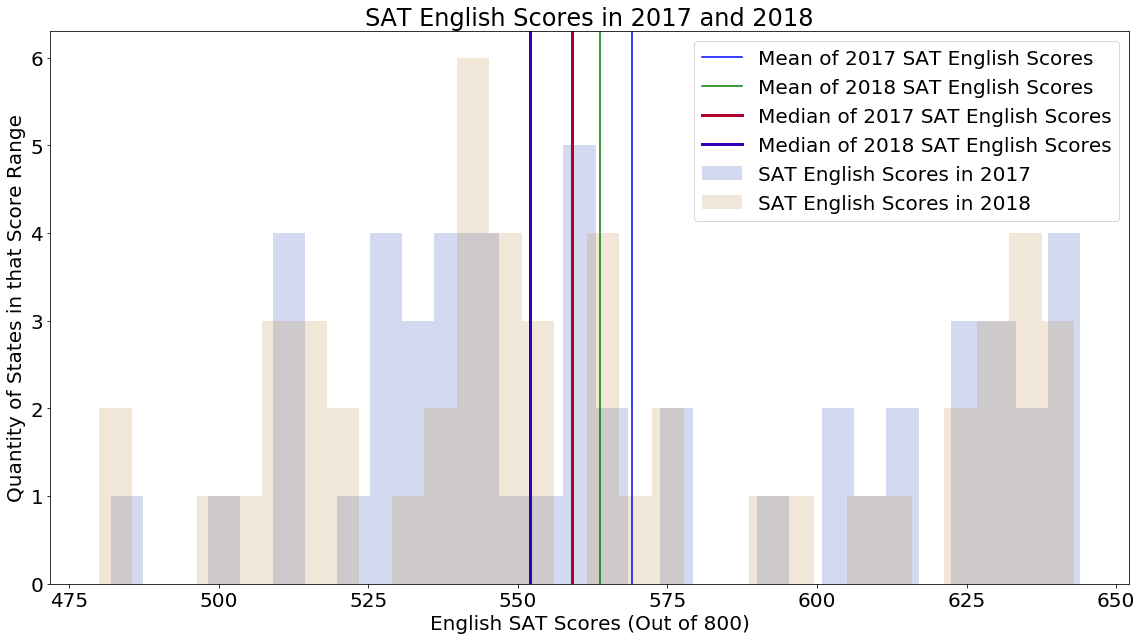

In [60]:
# Code
plt.figure(figsize=(16,9))

act_and_sat_final['reading_sat_2017'].hist(bins = 30, label = 'SAT English Scores in 2017', xlabelsize = 20, ylabelsize = 20, grid = False, color = (.14, .27, .67, .2))
act_and_sat_final['reading_sat_2018'].hist(bins = 30, label = 'SAT English Scores in 2018', xlabelsize = 20, ylabelsize = 20, grid = False, color = (.73, .54, .26, .2))


plt.axvline(act_and_sat_final['reading_sat_2017'].mean(), 
            color = 'b', 
            label = 'Mean of 2017 SAT English Scores')
plt.axvline(act_and_sat_final['reading_sat_2018'].mean(), 
            color = 'g', 
            label = 'Mean of 2018 SAT English Scores')
plt.axvline(act_and_sat_final['reading_sat_2017'].median(), 
            color = (.7, 0, .2), 
            lw = 3, 
            label = 'Median of 2017 SAT English Scores')
plt.axvline(act_and_sat_final['reading_sat_2018'].median(), 
            color = (.2, 0, .7), 
            lw = 3, 
            label = 'Median of 2018 SAT English Scores')


plt.xlabel('English SAT Scores (Out of 800)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('SAT English Scores in 2017 and 2018', fontsize = 24)


plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Eng_Scores_SAT_2017_and_2018.png')

The comparison of 2017 and 2018 english SAT shows a slight drop on overall scores year on year.

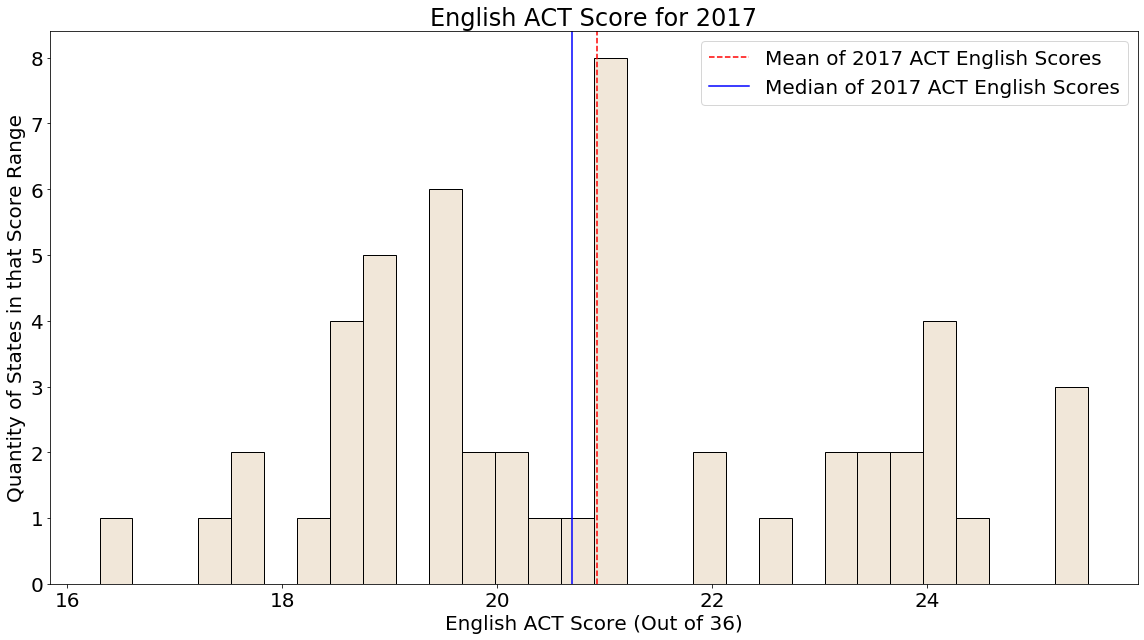

In [61]:
# Code
plt.figure(figsize=(16,9))

act_and_sat_final['english_act_2017'].hist(bins = 30, xlabelsize = 20, ylabelsize = 20, grid = False, color = (.73, .54, .26, .2), edgecolor = 'black')


plt.axvline(act_and_sat_final['english_act_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2017 ACT English Scores')
plt.axvline(act_and_sat_final['english_act_2017'].median(), 
            color = 'b', 
            label = 'Median of 2017 ACT English Scores')


plt.xlabel('English ACT Score (Out of 36)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('English ACT Score for 2017', fontsize = 24)

plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Eng_Scores_ACT.png')

The range of scores for the 2017 ACT exam appears to be further spread than their SAT counter parts.

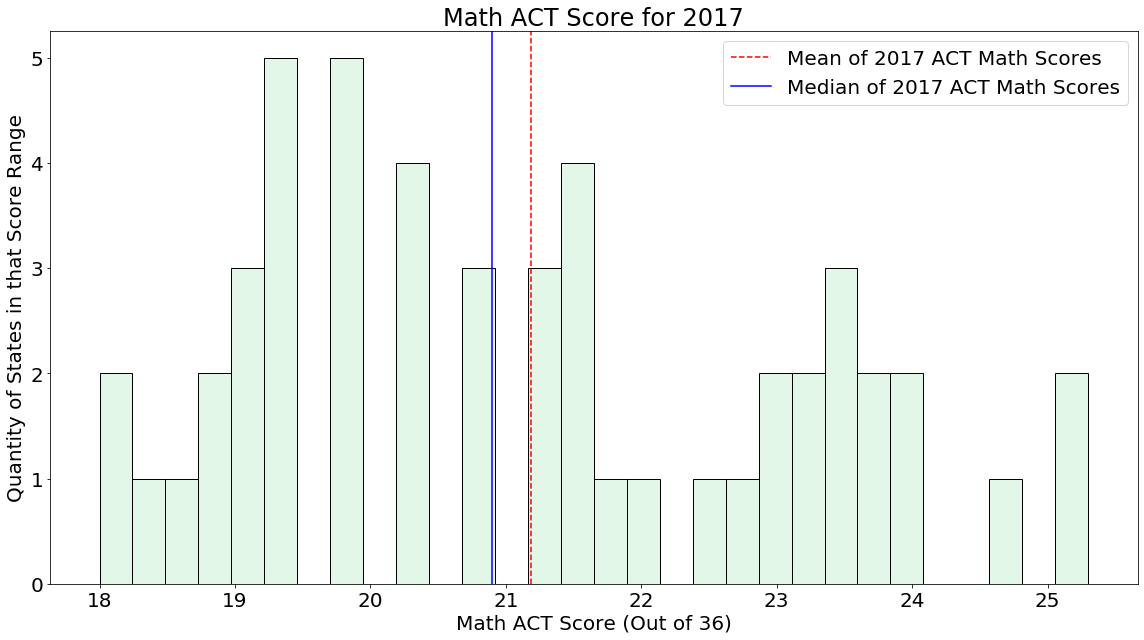

In [62]:
plt.figure(figsize=(16,9))

act_and_sat_final['math_act_2017'].hist(bins = 30, xlabelsize = 20, ylabelsize = 20, grid = False, color = (.46, .86, .55, .2), edgecolor = 'black')


plt.axvline(act_and_sat_final['math_act_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2017 ACT Math Scores')
plt.axvline(act_and_sat_final['math_act_2017'].median(), 
            color = 'b', 
            label = 'Median of 2017 ACT Math Scores')


plt.xlabel('Math ACT Score (Out of 36)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('Math ACT Score for 2017', fontsize = 24)

plt.legend(fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Math_Scores_ACT.png')

From an initial outlook, it appears the distribution is quite skewed to the right. 

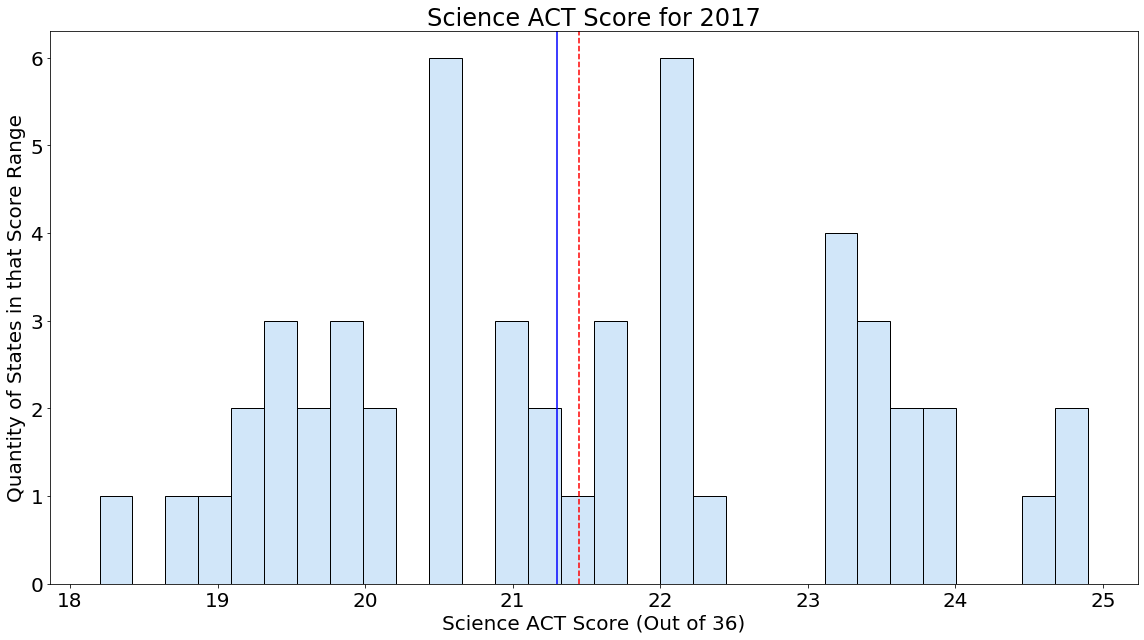

In [63]:
plt.figure(figsize=(16,9))

act_and_sat_final['science_act_2017'].hist(bins = 30, xlabelsize = 20, ylabelsize = 20, grid = False, color = (.11, .52, .89, .2), edgecolor = 'black')


plt.axvline(act_and_sat_final['science_act_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2017 ACT Science Scores')
plt.axvline(act_and_sat_final['science_act_2017'].median(), 
            color = 'b', 
            label = 'Median of 2017 ACT Science Scores')


plt.xlabel('Science ACT Score (Out of 36)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('Science ACT Score for 2017', fontsize = 24)


plt.tight_layout();

# plt.savefig('../graphs/Science_Scores_ACT.png')

The science scores for ACT in 2017 appears to be normal with the the majority of the scores focusing on the center.

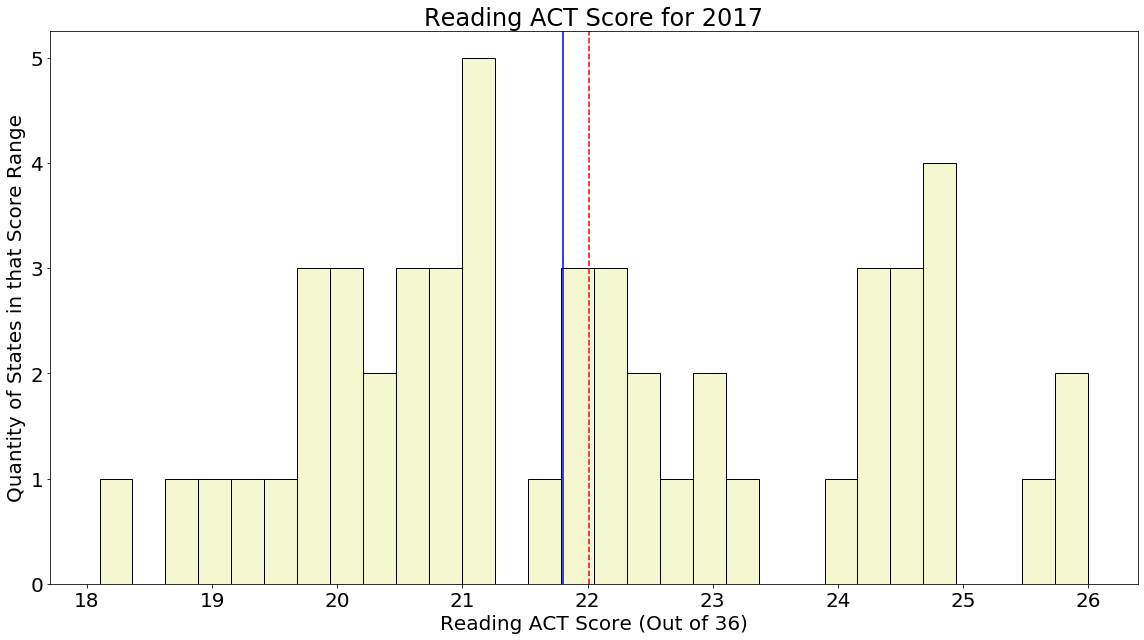

In [64]:
plt.figure(figsize=(16,9))

act_and_sat_final['reading_act_2017'].hist(bins = 30, xlabelsize = 20, ylabelsize = 20, grid = False, color = (.82, .86, .1, .2), edgecolor = 'black')


plt.axvline(act_and_sat_final['reading_act_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2018 ACT Reading Scores')
plt.axvline(act_and_sat_final['reading_act_2017'].median(), 
            color = 'b', 
            label = 'Median of 2018 ACT Reading Scores')


plt.xlabel('Reading ACT Score (Out of 36)', fontsize = 20)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20)

plt.title('Reading ACT Score for 2017', fontsize = 24)


plt.tight_layout();
# plt.savefig('../graphs/Reading_Scores_ACT.png')

The scores shown above for ACT reading 2017 also appears to be approach a normal distribution with its scores.

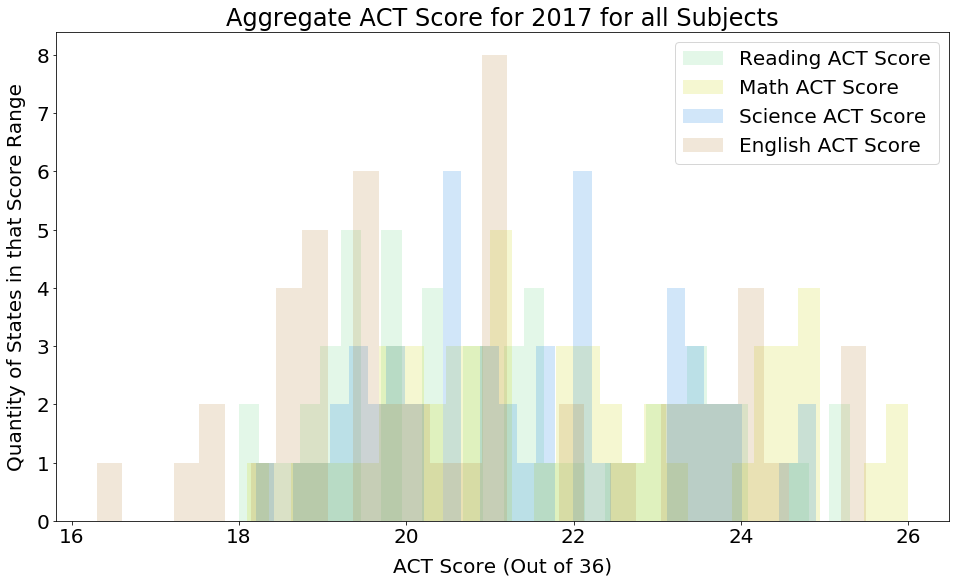

In [65]:
plt.figure(figsize=(16,9))

act_and_sat_final['math_act_2017'].hist(bins = 30, 
                                        label = 'Reading ACT Score',
                                        xlabelsize = 20, 
                                        ylabelsize = 20, 
                                        color = (.46, .86, .55, .2))
act_and_sat_final['reading_act_2017'].hist(bins = 30, 
                                           label = 'Math ACT Score',
                                           color = (.82, .86, .1, .2))
act_and_sat_final['science_act_2017'].hist(bins = 30, 
                                           label = 'Science ACT Score',
                                           color = (.11, .52, .89, .2))
act_and_sat_final['english_act_2017'].hist(bins = 30, 
                                           label = 'English ACT Score',
                                           color = (.73, .54, .26, .2), 
                                           grid = False,)




plt.xlabel('ACT Score (Out of 36)', fontsize = 20, labelpad = 10)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20, labelpad = 10)


plt.legend(fontsize = 20)
plt.title('Aggregate ACT Score for 2017 for all Subjects', fontsize = 24);

# plt.savefig('../graphs/Agg_Scores_ACT.png')

An overlay of all inidividual subject scores to compare their score distribution.

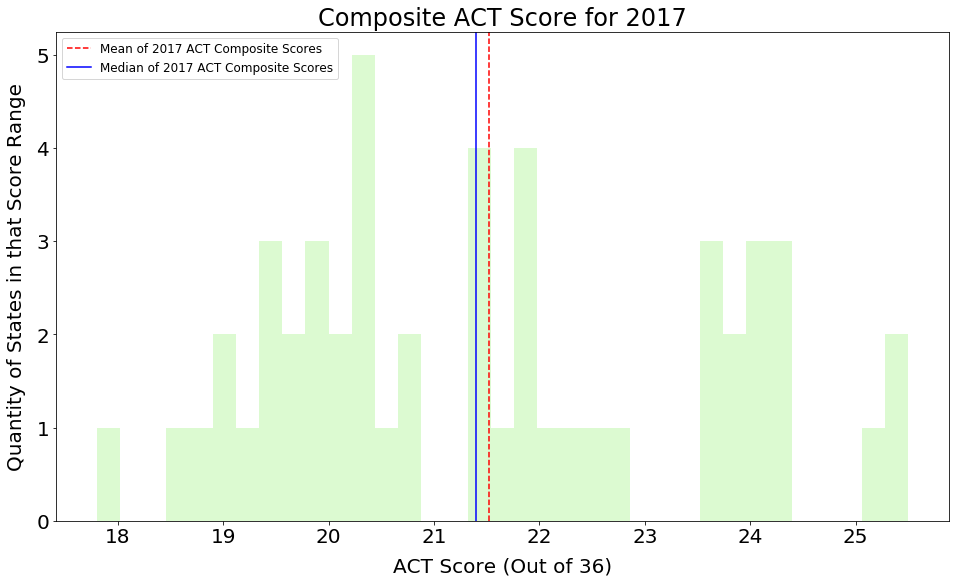

In [66]:
plt.figure(figsize=(16,9))

act_and_sat_final['composite_act_2017'].hist(bins = 35, 
                                        xlabelsize = 20, 
                                        ylabelsize = 20, 
                                        color = (.32, .9, .11, .2), grid = False)


plt.axvline(act_and_sat_final['composite_act_2017'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2017 ACT Composite Scores')
plt.axvline(act_and_sat_final['composite_act_2017'].median(), 
            color = 'b', 
            label = 'Median of 2017 ACT Composite Scores')

plt.xlabel('ACT Score (Out of 36)', fontsize = 20, labelpad = 10)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20, labelpad = 10)


plt.legend(fontsize = 12, loc = 'upper left')
plt.title('Composite ACT Score for 2017', fontsize = 24);

# plt.savefig('../graphs/Comp_Scores_ACT_2017.png')

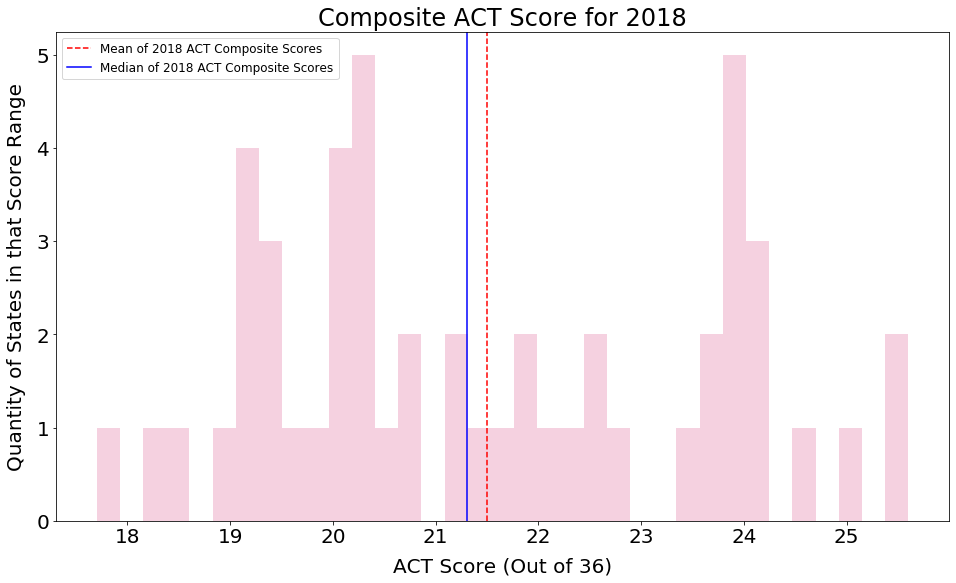

In [67]:
plt.figure(figsize=(16,9))

act_and_sat_final['composite_act_2018'].hist(bins = 35, 
                                             xlabelsize = 20, 
                                             ylabelsize = 20, 
                                             color = (.82, .1, .4, .2), grid = False)

plt.axvline(act_and_sat_final['composite_act_2018'].mean(), 
            color = 'r', 
            linestyle = '--', 
            label = 'Mean of 2018 ACT Composite Scores')
plt.axvline(act_and_sat_final['composite_act_2018'].median(), 
            color = 'b', 
            label = 'Median of 2018 ACT Composite Scores')

plt.xlabel('ACT Score (Out of 36)', fontsize = 20, labelpad = 10)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20, labelpad = 10)


plt.legend(fontsize = 12, loc = 'upper left')
plt.title('Composite ACT Score for 2018', fontsize = 24);

plt.savefig('../graphs/Comp_Scores_ACT_2018.png')

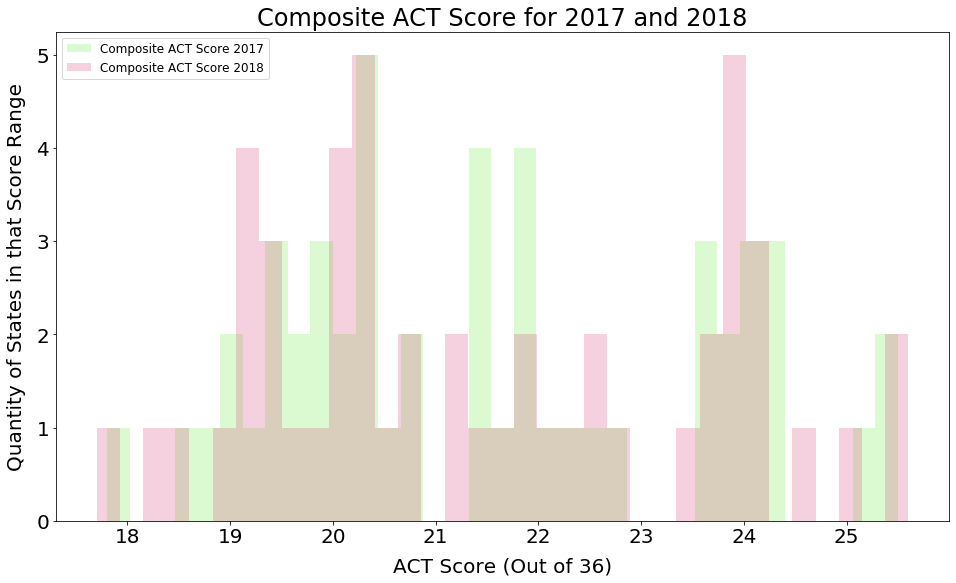

In [68]:
plt.figure(figsize=(16,9))

act_and_sat_final['composite_act_2017'].hist(bins = 35, 
                                        label = 'Composite ACT Score 2017',
                                        xlabelsize = 20, 
                                        ylabelsize = 20, 
                                        color = (.32, .9, .11, .2))
act_and_sat_final['composite_act_2018'].hist(bins = 35, 
                                           label = 'Composite ACT Score 2018',
                                           color = (.82, .1, .4, .2), grid = False)




plt.xlabel('ACT Score (Out of 36)', fontsize = 20, labelpad = 10)
plt.ylabel('Quantity of States in that Score Range', fontsize = 20, labelpad = 10)


plt.legend(fontsize = 12, loc = 'upper left')
plt.title('Composite ACT Score for 2017 and 2018', fontsize = 24);

# plt.savefig('../graphs/Comp_Scores_ACT_2017_2018.png')

After viewing all of the scores, every score has their median below the mean. However, some scores do not appear normal in term  of their distribution and this is probably due to the small size of data. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [69]:
def scatter_plot(dataframe, column1, column2, title, xlabel, ylabel):
    plt.figure(figsize=(10,8))
    
    sns.scatterplot(data = act_and_sat_final,x = column1, y = column2) 
    
    plt.xticks(size = 13)
    plt.yticks(size = 13)
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)

    plt.title(title, fontsize = 24)


    plt.tight_layout();

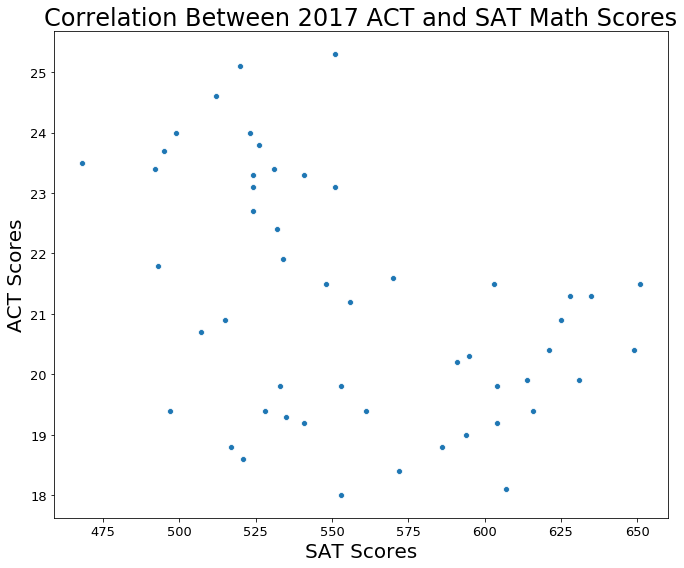

In [70]:
scatter_plot(act_and_sat_final, 
             'math_sat_2017', 
             'math_act_2017', 
             'Correlation Between 2017 ACT and SAT Math Scores', 
             'SAT Scores', 
             'ACT Scores')

# plt.savefig('../graphs/Corr_ACT_and_SAT_Math_2017.png')

Without performing a correlation slope calculation, it appears there is little correlation between the 2 test scores. 

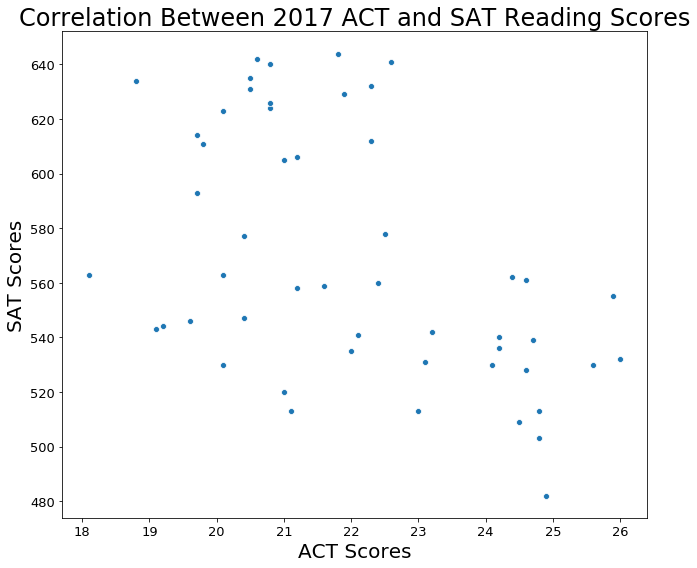

In [71]:
scatter_plot(act_and_sat_final, 
             'reading_act_2017',
             'reading_sat_2017', 
             'Correlation Between 2017 ACT and SAT Reading Scores', 
             'ACT Scores', 
             'SAT Scores')

# plt.savefig('../graphs/Corr_ACT_and_SAT_Eng_2017.png')

Similarly here, the english test scores appear to be randomly scatter with no relationship with one another.

<Figure size 936x720 with 0 Axes>

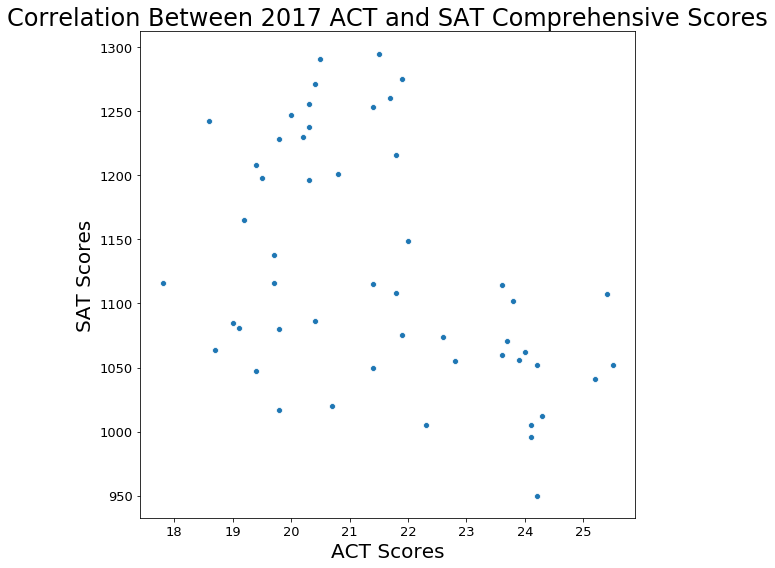

<Figure size 936x720 with 0 Axes>

In [72]:
scatter_plot(act_and_sat_final, 
             'composite_act_2017',
             'total_sat_2017', 
             'Correlation Between 2017 ACT and SAT Comprehensive Scores', 
             'ACT Scores', 
             'SAT Scores')

plt.figure(figsize=(13,10))

# plt.savefig('../graphs/Corr_ACT_and_SAT_Comp_2017.png')

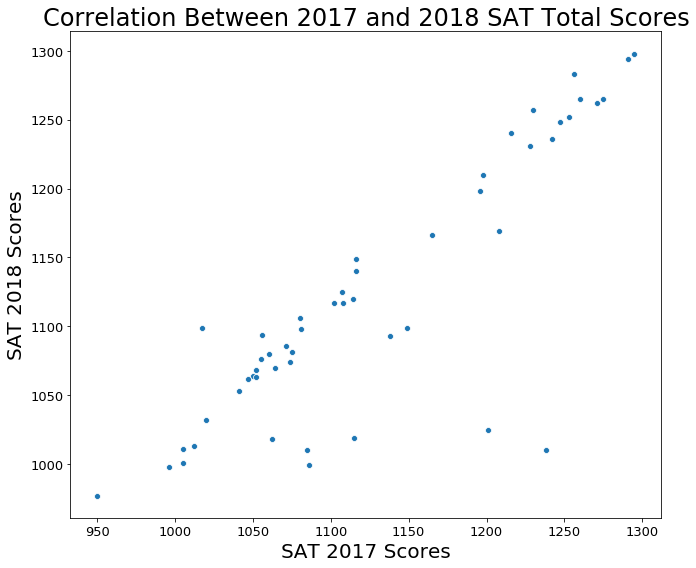

In [73]:
scatter_plot(act_and_sat_final, 
             'total_sat_2017',
             'total_sat_2018', 
             'Correlation Between 2017 and 2018 SAT Total Scores', 
             'SAT 2017 Scores', 
             'SAT 2018 Scores')

# plt.savefig('../graphs/Corr_SAT_Total_2017_2018.png')

Here we observe year on year the SAT test scores do not deviation too much from each other. Students do not score that differently across the US with the except of a couple of outliers.

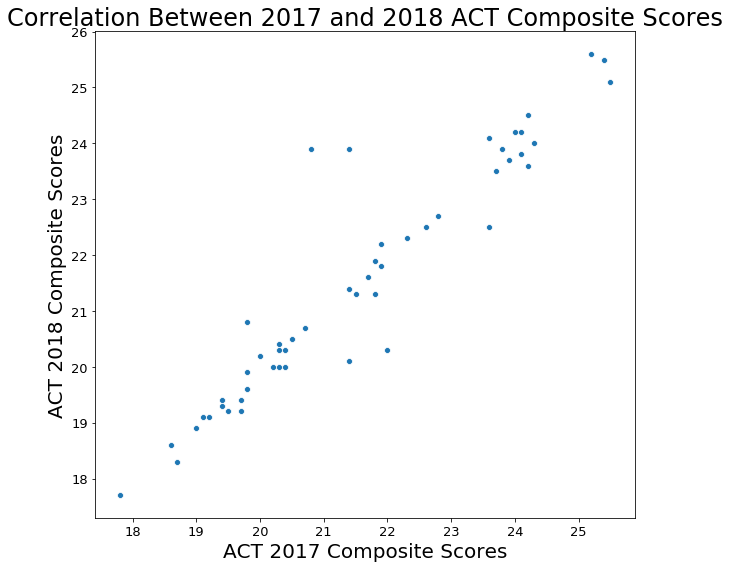

In [74]:
scatter_plot(act_and_sat_final, 
             'composite_act_2017',
             'composite_act_2018', 
             'Correlation Between 2017 and 2018 ACT Composite Scores', 
             'ACT 2017 Composite Scores', 
             'ACT 2018 Composite Scores')

# plt.savefig('../graphs/Corr_ACT_Comp_2017_2018.png')

The ACT scores are more consistent with year on year score expectation. 

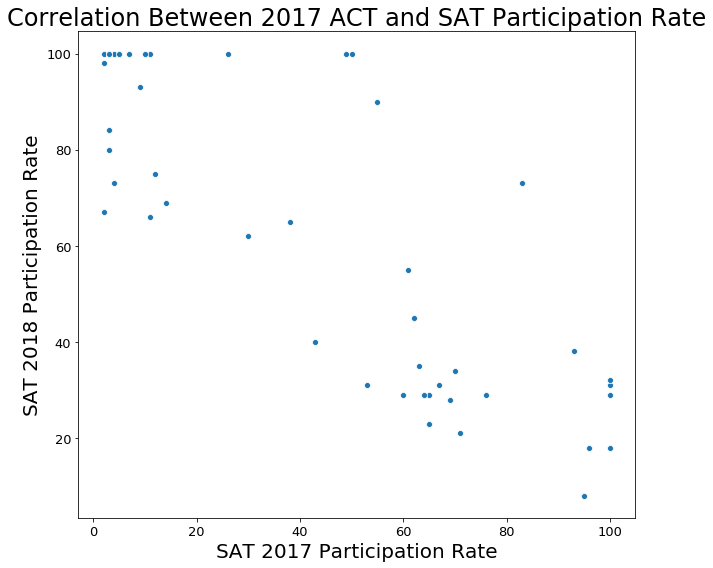

In [75]:
scatter_plot(act_and_sat_final, 
             'participation_sat_2017',
             'participation_act_2017', 
             'Correlation Between 2017 ACT and SAT Participation Rate', 
             'SAT 2017 Participation Rate', 
             'SAT 2018 Participation Rate')

# plt.savefig('../graphs/Corr_ACT_SAT_Participation_2017.png')

The particiation rate of both exams appears to be inversely related with one another. This could be the fact that students that one of the exams do not take the other.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

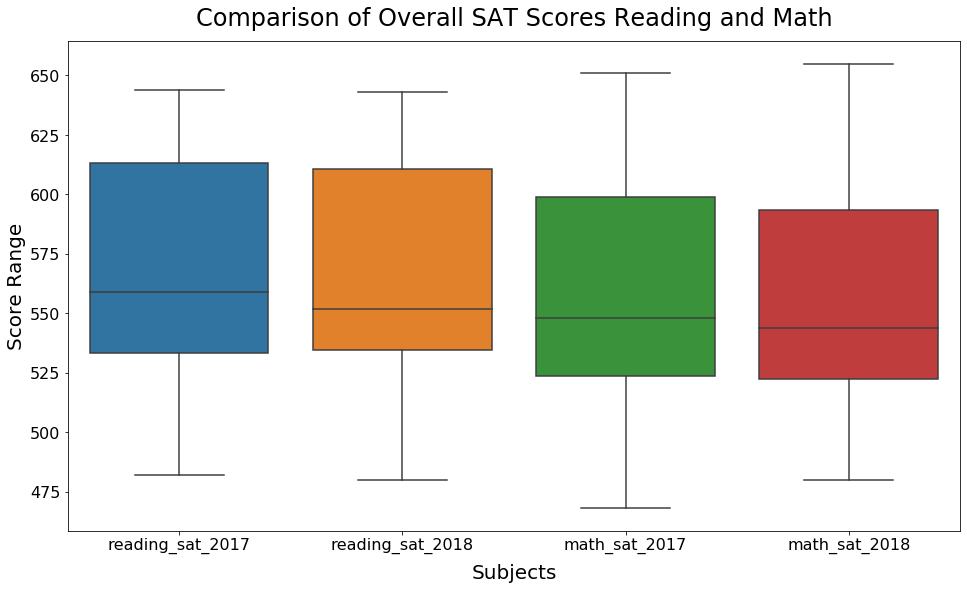

In [76]:
# Code
plt.figure(figsize=(16,9))

bp = sns.boxplot(data = act_and_sat_final[['reading_sat_2017','reading_sat_2018', 'math_sat_2017', 'math_sat_2018']])


bp.set_title("Comparison of Overall SAT Scores Reading and Math", fontsize = 24, y = 1.02)
bp.set_xlabel('Subjects', fontsize = 20, labelpad = 10)
bp.set_ylabel('Score Range', fontsize = 20)
plt.xticks(size = 16)
plt.yticks(size = 16);


plt.savefig('../graphs/Box_SAT_All.png')

The plot above shows the comparison of their percentiles of scores for the SAT. We can see clearer here that the scores have dropped year over year for both subjects. 

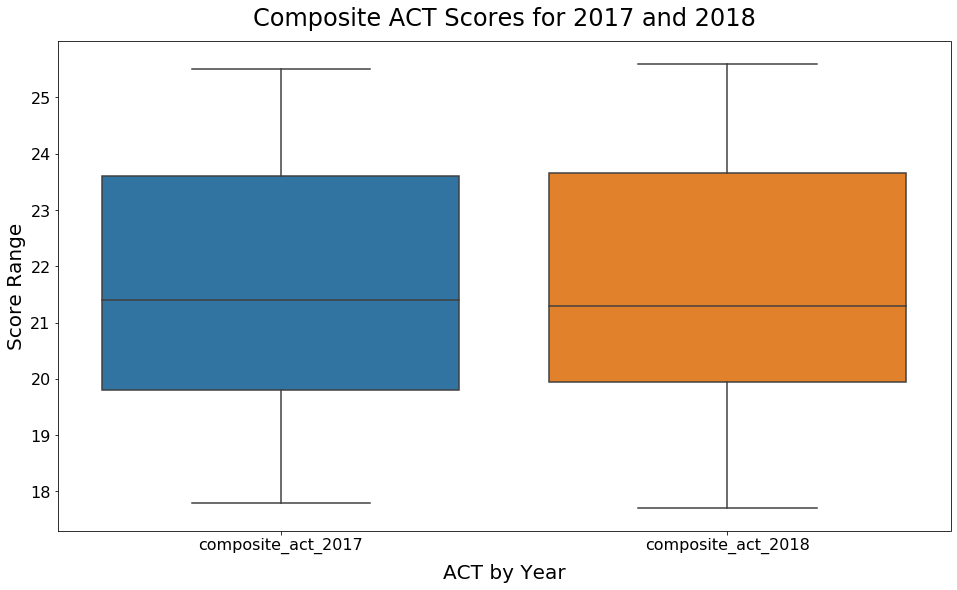

In [77]:
plt.figure(figsize=(16,9))

bp = sns.boxplot(data = act_and_sat_final[['composite_act_2017', 'composite_act_2018']])

bp.set_title("Composite ACT Scores for 2017 and 2018", fontsize = 24, y = 1.02)
bp.set_xlabel('ACT by Year', fontsize = 20, labelpad = 10)
bp.set_ylabel('Score Range', fontsize = 20)
plt.xticks(size = 16)
plt.yticks(size = 16);


# plt.savefig('../graphs/Box_ACT_Comp.png')

As shown in the scatter plots above, the ACT scores are more consistent year on year. Here we see the scores have no changed much and their median and almost leveled.

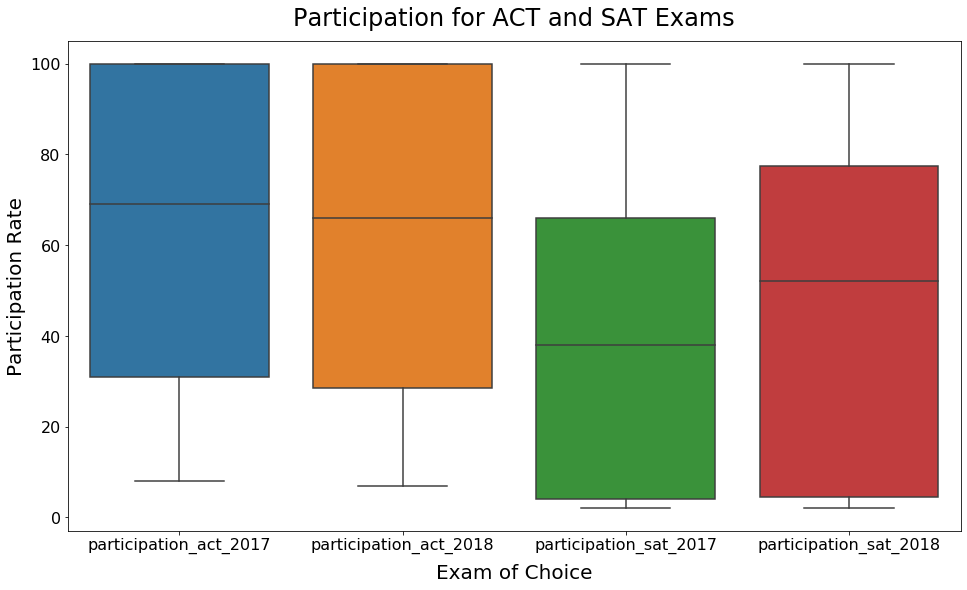

In [78]:
plt.figure(figsize=(16,9))

bp = sns.boxplot(data = act_and_sat_final[['participation_act_2017', 'participation_act_2018', 'participation_sat_2017', 'participation_sat_2018']])


bp.set_title("Participation for ACT and SAT Exams", fontsize = 24, y = 1.02)
bp.set_xlabel('Exam of Choice', fontsize = 20, labelpad = 10)
bp.set_ylabel('Participation Rate', fontsize = 20)
plt.xticks(size = 16)
plt.yticks(size = 16);

# plt.savefig('../graphs/Box_ACT_SAT_Part.png')

Here is an interesting illustration of the participation rates for both exams. ACT appears to have more participants than their SAT counterpart. This is  surprisingly as later research shows that SAT is gaining traction on various states to be the exam of choice. It would be interesting to see how 2019 data for the deltas in participation rates.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

It appears the correlation between ACT and SAT participation rates is negatively correlated. After examining the heatmap for all columns, it was curious to see if the participation rate of a particular test would have any relationship to their test scores. It appears that when the participiation rate increases for a particular test (i.e. SAT) the respective score actually decreases. This is also true for ACT test scores. The converse is also true where the increase in participation rate of SAT tests has a positive correlation to ACT test scores. This is quite strange and could be due to influx of test takers will decrease the average of that test. By that assumption, it is possible less people taking the test will increase the average overall. Another hypothesis is the test takers that are confident will take the exam and score high whereas the if there are more test takers, some are not quite ready for the exam thus, lowering the overall average score.

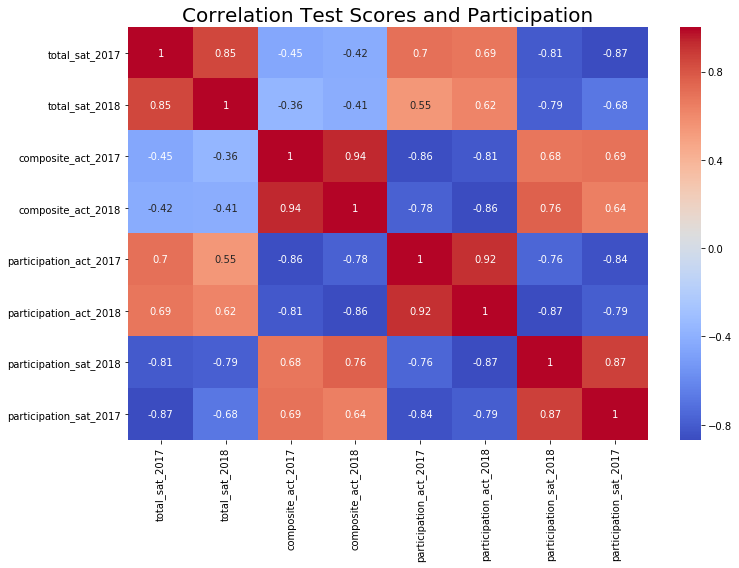

In [79]:
plt.figure(figsize=(11,8))

# mask = np.zeros_like(act_and_sat_final[['total_sat_2017', 
#                                         'total_sat_2018', 
#                                         'participation_act_2017', 
#                                         'participation_act_2018', 
#                                         'composite_act_2017', 
#                                         'composite_act_2018', 
#                                         'participation_sat_2018', 
#                                         'participation_sat_2017']].corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(act_and_sat_final[['total_sat_2017', 
                               'total_sat_2018', 
                               'composite_act_2017', 
                               'composite_act_2018',
                               'participation_act_2017', 
                               'participation_act_2018', 
                               'participation_sat_2018', 
                               'participation_sat_2017']].corr(), cmap = 'coolwarm', annot = True)



plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

plt.title('Correlation Test Scores and Participation', fontsize = 20)
plt.tight_layout();

# plt.savefig('../graphs/Heatmap_Test_and_Part.png')

The heatmap here focuses on aggregate test scores with participation rates. It appears that as test scores go up, participation rates decrease. The inverse is also true. This could imply that just simply boosting participation rates does not benefit the overall score for all states. Perhaps there are factors involve that influence a decrease with average score as more examinees join the testing room such as students being unprepared or mandatory requirement for graudation.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [80]:
numeric_df = act_and_sat_final.select_dtypes(include = [np.number])
std_dict = {columns: float("{0:.5}".format(s_d(act_and_sat_final[columns]))) for columns in numeric_df}
for i,j in std_dict.items():
    print('The standard deviation for', i, 'is', j)

The standard deviation for participation_act_2017 is 31.824
The standard deviation for english_act_2017 is 2.3305
The standard deviation for math_act_2017 is 1.9625
The standard deviation for reading_act_2017 is 2.0469
The standard deviation for science_act_2017 is 1.7222
The standard deviation for composite_act_2017 is 2.0008
The standard deviation for participation_sat_2017 is 34.929
The standard deviation for reading_sat_2017 is 45.217
The standard deviation for math_sat_2017 is 46.657
The standard deviation for total_sat_2017 is 91.584
The standard deviation for participation_act_2018 is 33.702
The standard deviation for composite_act_2018 is 2.0908
The standard deviation for participation_sat_2018 is 36.947
The standard deviation for reading_sat_2018 is 47.035
The standard deviation for math_sat_2018 is 47.302
The standard deviation for total_sat_2018 is 93.227


In [81]:
mean_dict = {columns: ("{0:.5}".format(act_and_sat_final[columns].mean())) for columns in numeric_df}

for i,j in mean_dict.items():
    print('The mean for', i, 'is', j)

The mean for participation_act_2017 is 65.255
The mean for english_act_2017 is 20.931
The mean for math_act_2017 is 21.182
The mean for reading_act_2017 is 22.014
The mean for science_act_2017 is 21.451
The mean for composite_act_2017 is 21.52
The mean for participation_sat_2017 is 39.804
The mean for reading_sat_2017 is 569.12
The mean for math_sat_2017 is 556.88
The mean for total_sat_2017 is 1126.1
The mean for participation_act_2018 is 61.725
The mean for composite_act_2018 is 21.496
The mean for participation_sat_2018 is 45.745
The mean for reading_sat_2018 is 563.69
The mean for math_sat_2018 is 556.24
The mean for total_sat_2018 is 1120.0


In [82]:
min_dict = {columns: act_and_sat_final[columns].min() for columns in numeric_df}

for i,j in min_dict.items():
    print('The minimum value for', i, 'is', j)

The minimum value for participation_act_2017 is 8
The minimum value for english_act_2017 is 16.3
The minimum value for math_act_2017 is 18.0
The minimum value for reading_act_2017 is 18.1
The minimum value for science_act_2017 is 18.2
The minimum value for composite_act_2017 is 17.8
The minimum value for participation_sat_2017 is 2
The minimum value for reading_sat_2017 is 482
The minimum value for math_sat_2017 is 468
The minimum value for total_sat_2017 is 950
The minimum value for participation_act_2018 is 7
The minimum value for composite_act_2018 is 17.7
The minimum value for participation_sat_2018 is 2
The minimum value for reading_sat_2018 is 480.0
The minimum value for math_sat_2018 is 480.0
The minimum value for total_sat_2018 is 977.0


In [83]:
max_dict = {columns: act_and_sat_final[columns].min() for columns in numeric_df}

for i,j in max_dict.items():
    print('The maximum value for', i, 'is', j)

The maximum value for participation_act_2017 is 8
The maximum value for english_act_2017 is 16.3
The maximum value for math_act_2017 is 18.0
The maximum value for reading_act_2017 is 18.1
The maximum value for science_act_2017 is 18.2
The maximum value for composite_act_2017 is 17.8
The maximum value for participation_sat_2017 is 2
The maximum value for reading_sat_2017 is 482
The maximum value for math_sat_2017 is 468
The maximum value for total_sat_2017 is 950
The maximum value for participation_act_2018 is 7
The maximum value for composite_act_2018 is 17.7
The maximum value for participation_sat_2018 is 2
The maximum value for reading_sat_2018 is 480.0
The maximum value for math_sat_2018 is 480.0
The maximum value for total_sat_2018 is 977.0


Answer: While viewing the graphs for scores for each of the subject, the distribution seems to approach normal of the sample size is large enough. All of the median were smaller than the mean which shows all scores are skewed ever so slightly to the right. Most of the scores looks quite spread but further examining the barplot, SAT score changes year on year were greater, or at least more observable than their ACT counter parts. In addition, the participation rates exhibited huge fluctuate from 2017 and 2018 also as shown in the subplots. And finally, through the application of t-testing, there seems to be a statistically significant chance that the participation rates were not just occurance of chance, but there seems to be a factor that cause the huge population change in taking the exams.



#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: The histogram charts produced above seems to have a bell shaped curve forming but due to the small data set, it was not as pronouced as opposed to a larger set of data.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Math and reading scores appears to follow a normal distribution behavior. Rates however, appears to be heavily skewed to either the left or the right. This can cause bias when examining data.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Performing a relational analysis between ACT and SAT participations is sensical in this case. Most statiscians would hypothesize that if an examinee attends to one of the exam, that examinee probably will not attend the other. In that sense, one would suspect they are negatively related. Since we are taking the total population of all possible data points, there would be no need to worry for bias since the data is absolute. The concern for confidence of the result would not be an issue when derived their relationship. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Because the SAT and ACT raw scores have different scoring ranges, it would not yield any interesting results if we compare them directly. It might be meaningful to convert their scores into percentages and then compare them to each other but if we take their numbers at face value, there would not be anything substantial to identity.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [84]:
# Code: 
from scipy.stats import ttest_ind
import scipy.stats as stats

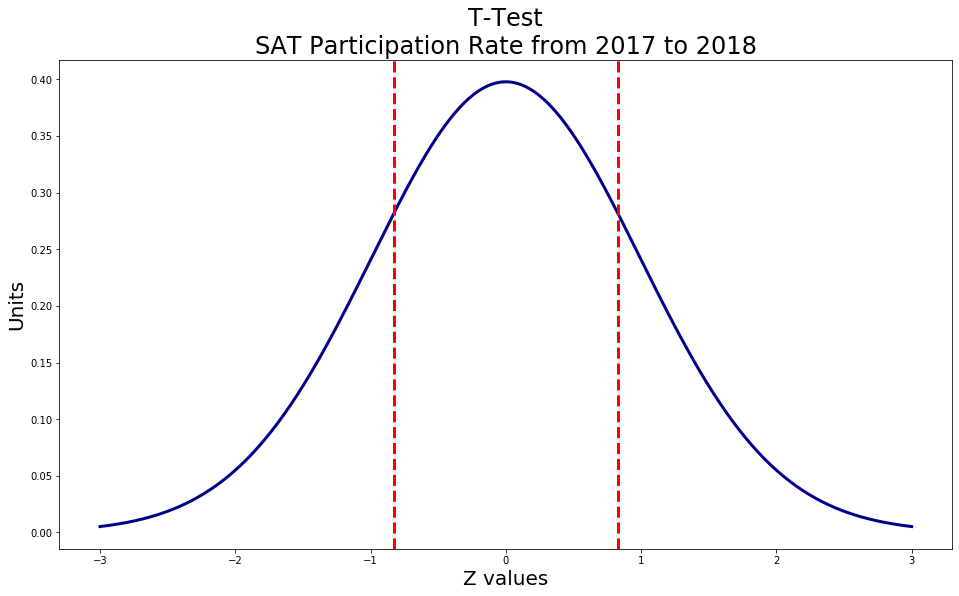

In [85]:
# code from our lecture about hypthesis testing

sat_stat = ttest_ind(act_and_sat_final['participation_sat_2017'], act_and_sat_final['participation_sat_2018'], equal_var = False)
tt = sat_stat.statistic

xpoints = np.linspace(-3, 3, 500)
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

fig = plt.figure(figsize=(16,9))

ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkblue')


ax.axvline(tt, color='red', linestyle='--', lw= 3)
ax.axvline(-tt, color='red', linestyle='--', lw= 3)


plt.title('T-Test\nSAT Participation Rate from 2017 to 2018', fontsize = 24)
plt.xlabel('Z values', fontsize = 20)
plt.ylabel('Units', fontsize = 20)


;

plt.savefig('../graphs/t_test_SAT.png')

Null Hypothesis: The change in SAT participation rates were not affected by external or internal factors

Result: Because the alpha is greater than .05, the null hypothesis is rejected, thus showing there could be some factors in participation rates changing year on year.

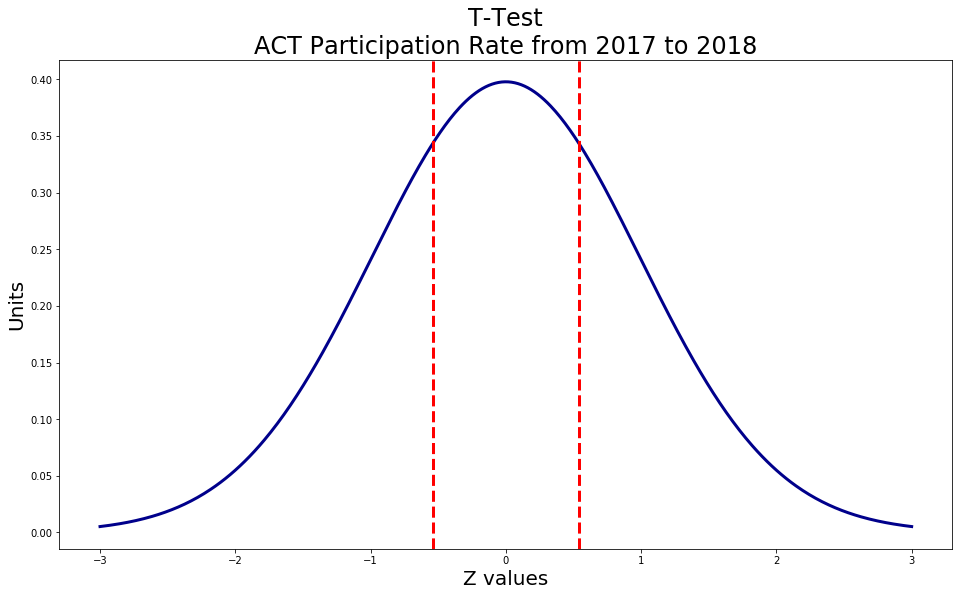

In [86]:
# code from our lecture about hypthesis testing

act_z = ttest_ind(act_and_sat_final['participation_act_2017'], act_and_sat_final['participation_act_2018'], equal_var = False)
part_stat = act_z.statistic

xpoints = np.linspace(-3, 3, 500)
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

fig = plt.figure(figsize=(16,9))

ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkblue')


ax.axvline(part_stat, color='red', linestyle='--', lw= 3)
ax.axvline(-part_stat, color='red', linestyle='--', lw= 3)


plt.title('T-Test\nACT Participation Rate from 2017 to 2018', fontsize = 24)
plt.xlabel('Z values', fontsize = 20)
plt.ylabel('Units', fontsize = 20);

# plt.savefig('../graphs/t_test_ACT.png')

Null Hypothesis: The ACT change in participation rates were not affected by external or internal factors

Result: Because the alpha is greater than .05, the null hypothesis is rejected, thus showing there could be some factors in participation rates changing year on year. 

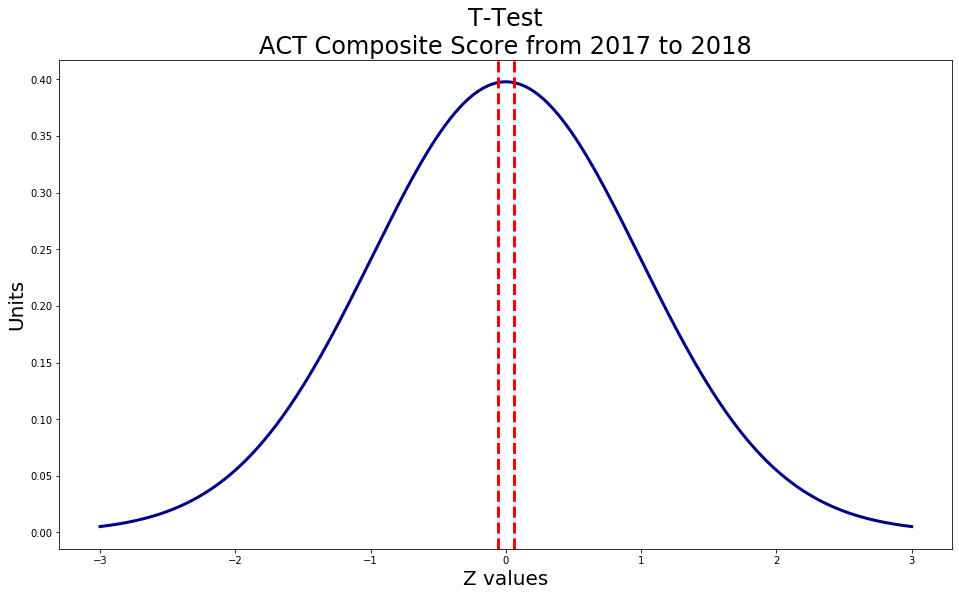

In [87]:
act_z = ttest_ind(act_and_sat_final['composite_act_2017'], act_and_sat_final['composite_act_2018'], equal_var = False)
comp_stat = act_z.statistic

xpoints = np.linspace(-3, 3, 500)
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

fig = plt.figure(figsize=(16,9))

ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkblue')


ax.axvline(comp_stat, color='red', linestyle='--', lw= 3)
ax.axvline(-comp_stat, color='red', linestyle='--', lw= 3)


plt.title('T-Test\nACT Composite Score from 2017 to 2018', fontsize = 24)
plt.xlabel('Z values', fontsize = 20)
plt.ylabel('Units', fontsize = 20);

plt.savefig('../graphs/t_test_ACT_Composite.png')

Null Hypthesis: 2017 SAT scores are not influence by a factor such as participations in relationship to the 2018 SAT scores.

Result: It appears the alpha value was greater than .05. We will have reject the null hypothesis and affirm that there are some factors in causing test scores to change so much year over year.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [88]:
# slicing all ACT SAT partipcation dataframes and setting it to a variable

part_analysis = act_and_sat_final[['state', 'participation_act_2017', 'participation_act_2018', 'participation_sat_2017', 'participation_sat_2018']] 

In [89]:
part_analysis

,state,participation_act_2017,participation_act_2018,participation_sat_2017,participation_sat_2018
0,Alabama,100,100,5,6
1,Alaska,65,33,38,43
2,Arizona,62,66,30,29
3,Arkansas,100,100,3,5
4,California,31,27,53,60
5,Colorado,100,30,11,100
6,Connecticut,31,26,100,100
7,Delaware,18,17,100,100
8,District of Columbia,32,32,100,92
9,Florida,73,66,83,56


Colorado - Huge decrease in ACT participation but full participation in for elligible SAT examinees

Info: Colorado has decided to retire ACT exams in favor of SAT for highschool juniors. A large effort scaled bidding process was performed to win over the State in hopes to make SAT, as well as PSAT mandatory for their highschool students that wish to attend to college. While many were still in favor ACT testing, the argument for SAT involves the examining of reason and logical derivation rather than factual based testing.

source: https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/

Illinois - Huge decrease in ACT participation while near 100% increase in SAT participation

Info: Similar to Colorado, Illinois went through a rigorous bidding process by the SAT board for the State to adopt SAT as the test of choice for college admissions. However, the ACT participation rate has not dropped as far as Colorado because some schools were offering the test for free. Many felt that the familiarity of ACT would bring comfort for test takers but most schools are transitioning to prep students for the SAT.

source: https://www.chicagotribune.com/news/breaking/ct-iillinois-act-exam-met-20170414-story.html#

Ohio: ACT participation rates jump to 100% and SAT gained a small boost in SAT participation rate

Info: The State decided to pay for all student's exam fees for the first time in 2018. This cause a spike in exam paricipation since any student can take it for free. However, the ramification for this was a huge drop in test scores because many students were not ready for the test either mentally or academically. As a result, the composite score dropped 1.7 points year on year. As we saw from the heatmaps above, there seems to be a negative correlation between high participation rates and low test averages. For Ohio, we can see this phenomenon happen between 2017 and 2018.

souce: https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/

Opinion: It appears for states that are switching from ACT to SAT exams, many instructors or members of the education were reluctant at first due to the unfamiliarity of its structure. They fear their students will not adopt to a different format and prep courses would not be able to brief materials in time. However, If the SAT exam does indeed test on cognitive skills rather than factual information, it can give colleges a better measure at an individual's ability to solve complex problems that cannot be accounted to memorization. And as we can see, if we carelessly increase the participation rate as a charitable act, it can have negative results such as lower test scores.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

As the heatmap as well as the research in Ohio shows, higher participation rate is highly correlated with lower test scores. As explained above, this is can be attributed to have all students, rather they received enough preparation or not, take the exam and potentially lowering the average. From the data, it appears that Oregon has quite low rates for participation. This is caused by the state mandating the use of "Smarter Balance" (https://www.opb.org/news/article/oregon-schools-students-test-scores-2018-2017/) exams to gauge a student's proficientcy at academia. Because the Oregon has mutliple standardized test, each exam is trying to wrestle with each other for examinees across the state. 

I believe Oregon should vote to converge toward a single stanard for college admission exams. Because the exams themselves have different metric of measure how a particular student perform, it might be difficult for institutions to identify a student's ability. Therefore, I recommend all states, not just Oregon to adopt a single test policy, preferably SAT.